<a href="https://colab.research.google.com/github/BragatteMAS/R_Factor8-9/blob/master/ML_Fator8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard packages

In [ ]:
#math libraries
import numpy as np
import pandas as pd

In [ ]:
pd.__version__

'1.0.3'

In [ ]:
#vis libraries
import seaborn as sns
import bokeh as bk
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [ ]:
from google.colab import files

pd.set_option('display.max_columns', None)

In [ ]:
#Save files
#!pip install psutil requests
import psutil
import plotly.io as pio
pio.orca.config;

In [ ]:
#ML packages
##pip install tensorflow #old programm
## tensorflow-gpu==2.0.0-rc1 # update tensorflow2.0 GPU
!pip install --upgrade tensorflow==2.0.0-rc1 # update tensorflow CPU

In [ ]:
import tensorflow as tf
layers = tf.keras.layers

In [ ]:
!pip install watermark

In [ ]:
import watermark
%load_ext watermark

In [ ]:
%watermark -n -v -m -g -iv

seaborn    0.10.1
tensorflow 2.0.0-rc1
bokeh      1.4.0
plotly     4.4.1
watermark  2.0.2
psutil     5.4.8
numpy      1.18.4
pandas     1.0.3
Wed May 27 2020 

CPython 3.6.9
IPython 5.5.0

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.104+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
Git hash   :


# ML

In [ ]:
uploaded = files.upload()

Saving F8.xlsx to F8.xlsx


In [ ]:
F8 = pd.read_excel('F8.xlsx')#, header=1)
#pd.options.display.float_format = '{:,.4f}'.format
F8.head()

Mutações  Arg23Gly  Glu30Val  Val64Met  Lys67Glu  Phe70Ser  \
0     EP distance    7.0000  10.00000    0.0000  12.00000   0.00000   
1  hydrophobicity    4.1000   7.70000    6.1000   0.40000   3.60000   
2  C-C disruption    0.0000   0.00000    0.0000   0.00000   0.00000   
3            asAs    2.3124   0.66140    0.3290   2.51700   4.40460   
4            ases    2.8808   4.47854    2.9664   5.45924   2.53504   

   Leu117Arg  Glu132Ala  Ser138Arg  Glu162Lys  Gly201Glu  Leu217Arg  \
0    7.00000    8.00000    7.00000   16.00000    7.00000    4.00000   
1    8.30000    5.30000    3.80000    0.40000    3.10000    8.30000   
2    0.00000    0.00000    0.00000    0.00000    0.00000    0.00000   
3    0.80240    0.17460    0.82760    1.89600    0.76720    2.55800   
4    6.97906    3.91488    1.54412    5.75862    4.15114    6.27658   

   His228Arg  Arg259Thr  Cys267Tyr  Val285Gly  Cys348Tyr     WS  
0    7.00000    8.00000    0.00000    0.00000     0.0000  0.000  
1    0.00000    0.00000    3.80000    4.60000     3.8000  0.001  
2    0.00000    0.00000   10.00000    0.00000    10.0000  0.000  
3    3.22660    1.04560    0.12600    0.18320     2.1238  0.001  
4    5.06992    5.72562    1.99184    1.72168     1.5304  0.001

In [ ]:
F8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mutações   10 non-null     object 
 1   Arg23Gly   10 non-null     float64
 2   Glu30Val   10 non-null     float64
 3   Val64Met   10 non-null     float64
 4   Lys67Glu   10 non-null     float64
 5   Phe70Ser   10 non-null     float64
 6   Leu117Arg  10 non-null     float64
 7   Glu132Ala  10 non-null     float64
 8   Ser138Arg  10 non-null     float64
 9   Glu162Lys  10 non-null     float64
 10  Gly201Glu  10 non-null     float64
 11  Leu217Arg  10 non-null     float64
 12  His228Arg  10 non-null     float64
 13  Arg259Thr  10 non-null     float64
 14  Cys267Tyr  10 non-null     float64
 15  Val285Gly  10 non-null     float64
 16  Cys348Tyr  10 non-null     float64
 17  WS         10 non-null     float64
dtypes: float64(17), object(1)
memory usage: 1.5+ KB


In [ ]:
f8 = F8.T
f8.head()

0               1               2       3        4  \
Mutações  EP distance  hydrophobicity  C-C disruption    asAs     ases   
Arg23Gly            7             4.1               0  2.3124   2.8808   
Glu30Val           10             7.7               0  0.6614  4.47854   
Val64Met            0             6.1               0   0.329   2.9664   
Lys67Glu           12             0.4               0   2.517  5.45924   

                           5              6                     7  \
Mutações  Granthams distance  Sneaths index  Epsteins coefficient   
Arg23Gly                 2.5            4.3                  3.05   
Glu30Val                2.42            3.1                     5   
Val64Met                0.42            2.3                   0.5   
Lys67Glu                1.12            2.6                     0   

                         8                9  
Mutações  Miyatas distance  Exchangeability  
Arg23Gly              3.58             3.56  
Glu30Val              2.97             3.84  
Val64Met              0.64             7.08  
Lys67Glu              1.14             6.46

In [ ]:
f8.reset_index(inplace=True)
f8.head()

index            0               1               2       3        4  \
0  Mutações  EP distance  hydrophobicity  C-C disruption    asAs     ases   
1  Arg23Gly            7             4.1               0  2.3124   2.8808   
2  Glu30Val           10             7.7               0  0.6614  4.47854   
3  Val64Met            0             6.1               0   0.329   2.9664   
4  Lys67Glu           12             0.4               0   2.517  5.45924   

                    5              6                     7                 8  \
0  Granthams distance  Sneaths index  Epsteins coefficient  Miyatas distance   
1                 2.5            4.3                  3.05              3.58   
2                2.42            3.1                     5              2.97   
3                0.42            2.3                   0.5              0.64   
4                1.12            2.6                     0              1.14   

                 9  
0  Exchangeability  
1             3.56  
2             3.84  
3             7.08  
4             6.46

In [ ]:
header = f8.iloc[0] #Create a new variable called 'header' from the first row of the dataset
header

index                Mutações
0                 EP distance
1              hydrophobicity
2              C-C disruption
3                        asAs
4                        ases
5          Granthams distance
6               Sneaths index
7        Epsteins coefficient
8            Miyatas distance
9             Exchangeability
Name: 0, dtype: object

In [ ]:
f8 = f8.rename(columns = header) # Rename the dataframe's column values with the header variable
f8

Mutações  EP distance  hydrophobicity  C-C disruption    asAs     ases  \
0    Mutações  EP distance  hydrophobicity  C-C disruption    asAs     ases   
1    Arg23Gly            7             4.1               0  2.3124   2.8808   
2    Glu30Val           10             7.7               0  0.6614  4.47854   
3    Val64Met            0             6.1               0   0.329   2.9664   
4    Lys67Glu           12             0.4               0   2.517  5.45924   
5    Phe70Ser            0             3.6               0  4.4046  2.53504   
6   Leu117Arg            7             8.3               0  0.8024  6.97906   
7   Glu132Ala            8             5.3               0  0.1746  3.91488   
8   Ser138Arg            7             3.8               0  0.8276  1.54412   
9   Glu162Lys           16             0.4               0   1.896  5.75862   
10  Gly201Glu            7             3.1               0  0.7672  4.15114   
11  Leu217Arg            4             8.3               0   2.558  6.27658   
12  His228Arg            7               0               0  3.2266  5.06992   
13  Arg259Thr            8               0               0  1.0456  5.72562   
14  Cys267Tyr            0             3.8              10   0.126  1.99184   
15  Val285Gly            0             4.6               0  0.1832  1.72168   
16  Cys348Tyr            0             3.8              10  2.1238   1.5304   
17         WS            0           0.001               0   0.001    0.001   

    Granthams distance  Sneaths index  Epsteins coefficient  Miyatas distance  \
0   Granthams distance  Sneaths index  Epsteins coefficient  Miyatas distance   
1                  2.5            4.3                  3.05              3.58   
2                 2.42            3.1                     5              2.97   
3                 0.42            2.3                   0.5              0.64   
4                 1.12            2.6                     0              1.14   
5                 0.44            2.5                  4.05              3.45   
6                 2.04            3.3                  5.05              2.62   
7                 2.14            3.4                  3.15              2.46   
8                  2.2            3.7                   1.2              2.74   
9                 1.12            2.6                     0              1.14   
10                1.96            3.2                   2.6              2.78   
11                2.04            3.4                     5              2.62   
12                0.58            3.1                     1              0.82   
13                1.42            3.8                   1.1              2.03   
14                3.88            3.4                  0.65              2.38   
15                2.18            1.9                   2.6              2.76   
16                3.88            3.4                  0.65              2.38   
17                   0              0                     0                 0   

    Exchangeability  
0   Exchangeability  
1              3.56  
2              3.84  
3              7.08  
4              6.46  
5              6.68  
6              4.84  
7               5.5  
8               5.4  
9              5.44  
10             8.14  
11             4.84  
12             5.26  
13             5.98  
14             2.84  
15             4.16  
16             2.84  
17                0

In [ ]:
f8 = f8.drop([0])
f8.head()

Mutações EP distance hydrophobicity C-C disruption    asAs     ases  \
1  Arg23Gly           7            4.1              0  2.3124   2.8808   
2  Glu30Val          10            7.7              0  0.6614  4.47854   
3  Val64Met           0            6.1              0   0.329   2.9664   
4  Lys67Glu          12            0.4              0   2.517  5.45924   
5  Phe70Ser           0            3.6              0  4.4046  2.53504   

  Granthams distance Sneaths index Epsteins coefficient Miyatas distance  \
1                2.5           4.3                 3.05             3.58   
2               2.42           3.1                    5             2.97   
3               0.42           2.3                  0.5             0.64   
4               1.12           2.6                    0             1.14   
5               0.44           2.5                 4.05             3.45   

  Exchangeability  
1            3.56  
2            3.84  
3            7.08  
4            6.46  
5            6.68

## Evaluate dataset transforming the name of mutations into categorical information 
[Features_selection_ML](https://www.youtube.com/watch?v=4RGT2YRHERY&feature=em-uploademail)

In [ ]:
x = f8.drop(['Mutações'], axis = 1) #Todos dados numéricos menos coluna com informação categorica (nomes das características físico-químicas)
y = f8['Mutações'] #somente info categorica

In [ ]:
x

EP distance hydrophobicity C-C disruption    asAs     ases  \
1            7            4.1              0  2.3124   2.8808   
2           10            7.7              0  0.6614  4.47854   
3            0            6.1              0   0.329   2.9664   
4           12            0.4              0   2.517  5.45924   
5            0            3.6              0  4.4046  2.53504   
6            7            8.3              0  0.8024  6.97906   
7            8            5.3              0  0.1746  3.91488   
8            7            3.8              0  0.8276  1.54412   
9           16            0.4              0   1.896  5.75862   
10           7            3.1              0  0.7672  4.15114   
11           4            8.3              0   2.558  6.27658   
12           7              0              0  3.2266  5.06992   
13           8              0              0  1.0456  5.72562   
14           0            3.8             10   0.126  1.99184   
15           0            4.6              0  0.1832  1.72168   
16           0            3.8             10  2.1238   1.5304   
17           0          0.001              0   0.001    0.001   

   Granthams distance Sneaths index Epsteins coefficient Miyatas distance  \
1                 2.5           4.3                 3.05             3.58   
2                2.42           3.1                    5             2.97   
3                0.42           2.3                  0.5             0.64   
4                1.12           2.6                    0             1.14   
5                0.44           2.5                 4.05             3.45   
6                2.04           3.3                 5.05             2.62   
7                2.14           3.4                 3.15             2.46   
8                 2.2           3.7                  1.2             2.74   
9                1.12           2.6                    0             1.14   
10               1.96           3.2                  2.6             2.78   
11               2.04           3.4                    5             2.62   
12               0.58           3.1                    1             0.82   
13               1.42           3.8                  1.1             2.03   
14               3.88           3.4                 0.65             2.38   
15               2.18           1.9                  2.6             2.76   
16               3.88           3.4                 0.65             2.38   
17                  0             0                    0                0   

   Exchangeability  
1             3.56  
2             3.84  
3             7.08  
4             6.46  
5             6.68  
6             4.84  
7              5.5  
8              5.4  
9             5.44  
10            8.14  
11            4.84  
12            5.26  
13            5.98  
14            2.84  
15            4.16  
16            2.84  
17               0

In [ ]:
y

1      Arg23Gly
2      Glu30Val
3      Val64Met
4      Lys67Glu
5      Phe70Ser
6     Leu117Arg
7     Glu132Ala
8     Ser138Arg
9     Glu162Lys
10    Gly201Glu
11    Leu217Arg
12    His228Arg
13    Arg259Thr
14    Cys267Tyr
15    Val285Gly
16    Cys348Tyr
17           WS
Name: Mutações, dtype: object

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

In [ ]:
#features extraction
test = SelectKBest(chi2, k=4) 

In [ ]:
fit= test.fit(x,y)

In [ ]:
fit.get_support(indices=True) #best characteristcs

array([0, 1, 2, 7])

In [ ]:
features  = fit.transform(x) #Apply the learning

In [ ]:
print(features)

[[7.0 4.1 0.0 3.05]
 [10.0 7.7 0.0 5.0]
 [0.0 6.1 0.0 0.5]
 [12.0 0.4 0.0 0.0]
 [0.0 3.6 0.0 4.05]
 [7.0 8.3 0.0 5.05]
 [8.0 5.3 0.0 3.15]
 [7.0 3.8 0.0 1.2]
 [16.0 0.4 0.0 0.0]
 [7.0 3.1 0.0 2.6]
 [4.0 8.3 0.0 5.0]
 [7.0 0.0 0.0 1.0]
 [8.0 0.0 0.0 1.1]
 [0.0 3.8 10.0 0.65]
 [0.0 4.6 0.0 2.6]
 [0.0 3.8 10.0 0.65]
 [0.0 0.001 0.0 0.0]]


In [ ]:
cols = fit.get_support(indices = True)
f8.iloc[:,cols] #found columns with indices

Mutações EP distance hydrophobicity Sneaths index
1    Arg23Gly           7            4.1           4.3
2    Glu30Val          10            7.7           3.1
3    Val64Met           0            6.1           2.3
4    Lys67Glu          12            0.4           2.6
5    Phe70Ser           0            3.6           2.5
6   Leu117Arg           7            8.3           3.3
7   Glu132Ala           8            5.3           3.4
8   Ser138Arg           7            3.8           3.7
9   Glu162Lys          16            0.4           2.6
10  Gly201Glu           7            3.1           3.2
11  Leu217Arg           4            8.3           3.4
12  His228Arg           7              0           3.1
13  Arg259Thr           8              0           3.8
14  Cys267Tyr           0            3.8           3.4
15  Val285Gly           0            4.6           1.9
16  Cys348Tyr           0            3.8           3.4
17         WS           0          0.001             0

F_classify

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif 

In [ ]:
f_classif = SelectKBest(score_func=f_classif, k=4)

In [ ]:
fit = f_classif.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
features = fit.transform(x) 

In [ ]:
print(features) 

[[4.3 3.05 3.58 3.56]
 [3.1 5.0 2.97 3.84]
 [2.3 0.5 0.64 7.08]
 [2.6 0.0 1.14 6.46]
 [2.5 4.05 3.45 6.68]
 [3.3 5.05 2.62 4.84]
 [3.4 3.15 2.46 5.5]
 [3.7 1.2 2.74 5.4]
 [2.6 0.0 1.14 5.44]
 [3.2 2.6 2.78 8.14]
 [3.4 5.0 2.62 4.84]
 [3.1 1.0 0.82 5.26]
 [3.8 1.1 2.03 5.98]
 [3.4 0.65 2.38 2.84]
 [1.9 2.6 2.76 4.16]
 [3.4 0.65 2.38 2.84]
 [0.0 0.0 0.0 0.0]]


In [ ]:
cols = fit.get_support(indices = True)
f8.iloc[:,cols] #found columns with indices

Granthams distance Sneaths index Epsteins coefficient Miyatas distance
1                 2.5           4.3                 3.05             3.58
2                2.42           3.1                    5             2.97
3                0.42           2.3                  0.5             0.64
4                1.12           2.6                    0             1.14
5                0.44           2.5                 4.05             3.45
6                2.04           3.3                 5.05             2.62
7                2.14           3.4                 3.15             2.46
8                 2.2           3.7                  1.2             2.74
9                1.12           2.6                    0             1.14
10               1.96           3.2                  2.6             2.78
11               2.04           3.4                    5             2.62
12               0.58           3.1                    1             0.82
13               1.42           3.8                  1.1             2.03
14               3.88           3.4                 0.65             2.38
15               2.18           1.9                  2.6             2.76
16               3.88           3.4                 0.65             2.38
17                  0             0                    0                0

# `Profiling`

In [ ]:
#Install Pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#Import o ProfileReport
from pandas_profiling import ProfileReport 

In [ ]:
#Profile execution
profile =  ProfileReport(x, title='Relatório - Pandas Profiling for Factor8_9', html={'style':{'full_width':True}})

In [ ]:
profile

In [ ]:
#Saving report to disk
profile.to_file(output_file="Report_FActor8_9.html")

# `SweetViz`


In [ ]:
! pip install sweetviz

In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)
#display the report
advert_report.show_html('Advertising.html')

In [ ]:
df1 = sv.compare(df[100:], df[:100])
df1.show_html('Compare.html')

[Ref](https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde)


# [ML Pratical examples to Images](https://medium.com/@cran2367/install-and-setup-tensorflow-2-0-2c4914b9a265)

## ML Image CLassification

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

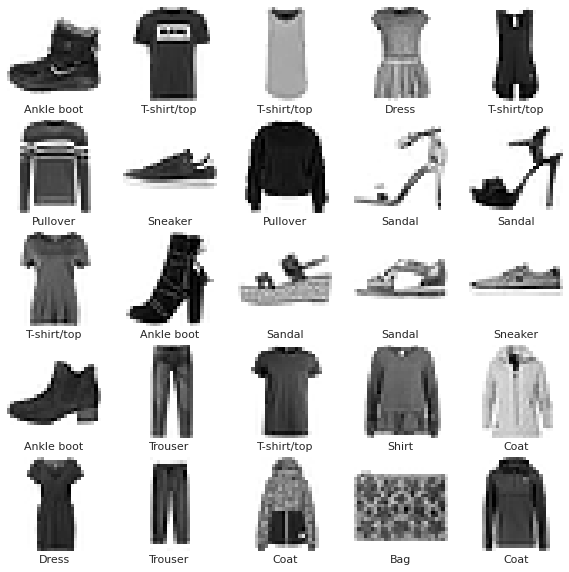

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(x_train[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5078 - accuracy: 0.8195
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3757 - accuracy: 0.8633
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3391 - accuracy: 0.8750
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3185 - accuracy: 0.8829
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3015 - accuracy: 0.8870


## ML Validation for Image Classification

In [ ]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3606431056022644, 0.8668]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
 
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

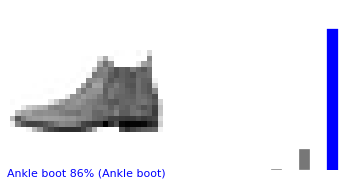

In [ ]:
predictions = model.predict(x_test)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

In [ ]:
predicted_label = class_names[np.argmax(predictions[0])]
print('Actual label:', class_names[y_test[0]]) 
print('Predicted label:', predicted_label)

Actual label: Ankle boot
Predicted label: Ankle boot


# Correlations


In [ ]:
correlation = x.corr()

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(x=correlation, annot=True)

In [ ]:
F8.head()

Mutações  Arg23Gly  Glu30Val  Val64Met  Lys67Glu  Phe70Ser  \
0     EP distance    7.0000  10.00000    0.0000  12.00000   0.00000   
1  hydrophobicity    4.1000   7.70000    6.1000   0.40000   3.60000   
2  C-C disruption    0.0000   0.00000    0.0000   0.00000   0.00000   
3            asAs    2.3124   0.66140    0.3290   2.51700   4.40460   
4            ases    2.8808   4.47854    2.9664   5.45924   2.53504   

   Leu117Arg  Glu132Ala  Ser138Arg  Glu162Lys  Gly201Glu  Leu217Arg  \
0    7.00000    8.00000    7.00000   16.00000    7.00000    4.00000   
1    8.30000    5.30000    3.80000    0.40000    3.10000    8.30000   
2    0.00000    0.00000    0.00000    0.00000    0.00000    0.00000   
3    0.80240    0.17460    0.82760    1.89600    0.76720    2.55800   
4    6.97906    3.91488    1.54412    5.75862    4.15114    6.27658   

   His228Arg  Arg259Thr  Cys267Tyr  Val285Gly  Cys348Tyr     WS  
0    7.00000    8.00000    0.00000    0.00000     0.0000  0.000  
1    0.00000    0.00000    3.80000    4.60000     3.8000  0.001  
2    0.00000    0.00000   10.00000    0.00000    10.0000  0.000  
3    3.22660    1.04560    0.12600    0.18320     2.1238  0.001  
4    5.06992    5.72562    1.99184    1.72168     1.5304  0.001

In [ ]:
f8t = F8.T
f8t.head()

0               1               2       3        4  \
Mutações  EP distance  hydrophobicity  C-C disruption    asAs     ases   
Arg23Gly            7             4.1               0  2.3124   2.8808   
Glu30Val           10             7.7               0  0.6614  4.47854   
Val64Met            0             6.1               0   0.329   2.9664   
Lys67Glu           12             0.4               0   2.517  5.45924   

                           5              6                     7  \
Mutações  Granthams distance  Sneaths index  Epsteins coefficient   
Arg23Gly                 2.5            4.3                  3.05   
Glu30Val                2.42            3.1                     5   
Val64Met                0.42            2.3                   0.5   
Lys67Glu                1.12            2.6                     0   

                         8                9  
Mutações  Miyatas distance  Exchangeability  
Arg23Gly              3.58             3.56  
Glu30Val              2.97             3.84  
Val64Met              0.64             7.08  
Lys67Glu              1.14             6.46

In [ ]:
x.head()

EP distance hydrophobicity C-C disruption    asAs     ases  \
1           7            4.1              0  2.3124   2.8808   
2          10            7.7              0  0.6614  4.47854   
3           0            6.1              0   0.329   2.9664   
4          12            0.4              0   2.517  5.45924   
5           0            3.6              0  4.4046  2.53504   

  Granthams distance Sneaths index Epsteins coefficient Miyatas distance  \
1                2.5           4.3                 3.05             3.58   
2               2.42           3.1                    5             2.97   
3               0.42           2.3                  0.5             0.64   
4               1.12           2.6                    0             1.14   
5               0.44           2.5                 4.05             3.45   

  Exchangeability  
1            3.56  
2            3.84  
3            7.08  
4            6.46  
5            6.68

In [ ]:
x.describe()

EP distance  hydrophobicity  C-C disruption    asAs    ases  \
count          17.0            17.0            17.0  17.000  17.000   
unique          7.0            12.0             2.0  17.000  17.000   
top             0.0             3.8             0.0   0.001   0.001   
freq            6.0             3.0            15.0   1.000   1.000   

        Granthams distance  Sneaths index  Epsteins coefficient  \
count                17.00           17.0                  17.0   
unique               14.00           12.0                  12.0   
top                   3.88            3.4                   0.0   
freq                  2.00            4.0                   3.0   

        Miyatas distance  Exchangeability  
count              17.00            17.00  
unique             14.00            15.00  
top                 2.62             4.84  
freq                2.00             2.00